In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving autos.csv to autos.csv


In [ ]:
car_df = pd.read_csv("autos.csv", sep = ",", decimal = '.', encoding = "ISO-8859-1")
print(car_df.head())

           dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType       brand notRepairedDamage  

In [ ]:
# Удалите столбцы, ценность которых для оценки стоимости машины низка

car_df.drop('dateCrawled', axis = 1, inplace = True)
car_df.drop('dateCreated', axis = 1, inplace = True)
car_df.drop('postalCode', axis = 1, inplace = True)
car_df.drop('lastSeen', axis = 1, inplace = True)

car_df

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures
0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,0
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,0
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,0
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,0
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,0
371524,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,0
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,0
371526,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,0


In [ ]:
# Удалите повторяющиеся строки 
# Удалите строки содержащие пропуски в данных 
# Выведите размер набора данных до и после удаления

In [ ]:
car_df.shape # размер набора данных до удаления

(371528, 16)

In [ ]:
car_df.drop_duplicates(keep = 'first', inplace = True) # удаление повторяющихся строк

In [ ]:
car_df.shape # размер набора данных после удаления повторяющихся строк

(365601, 16)

In [ ]:
car_df.dropna(axis = 0, inplace = True) # удаление строк, содержащих пропуски в данных 

In [ ]:
car_df.shape # размер набора данных после удаления строк, содержащих пропуски в данных

(256901, 16)

In [ ]:
car_df = car_df.loc[car_df['yearOfRegistration'] < 1980]
car_df.shape 

(1936, 16)

In [ ]:
car_df = car_df.loc[car_df['price'] < 3000]
car_df.shape

(313, 16)

In [ ]:
car_df = car_df.loc[car_df['powerPS'] > 100]
car_df.shape

(53, 16)

AxesSubplot(0.125,0.125;0.775x0.755)


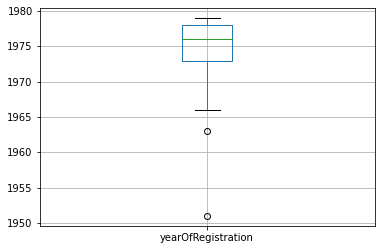

In [ ]:
print(car_df.boxplot(column = 'yearOfRegistration')) # оценка диапазона значений признака

AxesSubplot(0.125,0.125;0.775x0.755)


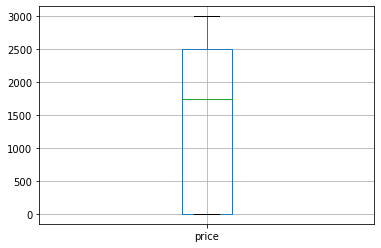

In [ ]:
print(car_df.boxplot(column = 'price'))

AxesSubplot(0.125,0.125;0.775x0.755)


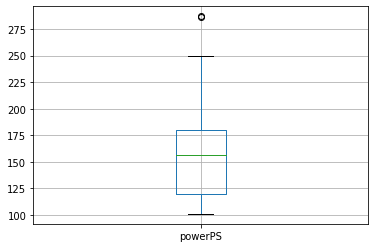

In [ ]:
print(car_df.boxplot(column = 'powerPS'))

In [ ]:
# Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу

AxesSubplot(0.125,0.125;0.775x0.755)


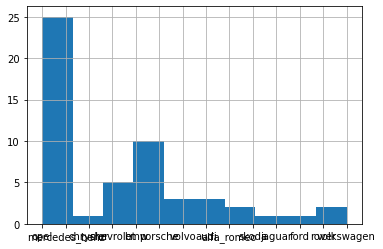

In [ ]:
print(car_df.brand.hist()) # гистограмма по маркам автомобилей

AxesSubplot(0.125,0.125;0.775x0.755)


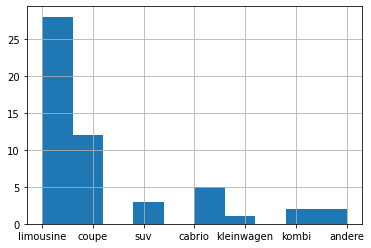

In [ ]:
print(car_df.vehicleType.hist()) # гистограмма по типам кузова

AxesSubplot(0.125,0.125;0.775x0.755)


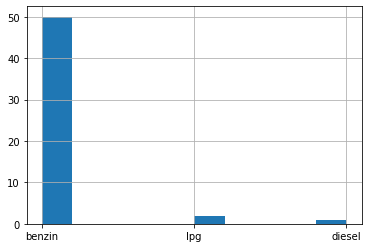

In [ ]:
print(car_df.fuelType.hist()) # гистограмма по используемому топливу

In [ ]:
# Добавьте в данные новый признак, который представляет собой длину названия автомобиля

In [ ]:
car_df['NameLen'] = len(car_df['name'])
car_df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,NameLen
6960,Opel_Commodore,privat,Angebot,2500,test,limousine,1972,automatik,160,andere,80000,10,benzin,opel,nein,0,53
24177,Opel_Diplomat_B_Bj._1976_Restaurationsbasis_m....,privat,Angebot,1600,control,limousine,1976,automatik,140,andere,70000,5,benzin,opel,nein,0,53
29207,Opel_Rekord,privat,Angebot,1000,test,limousine,1978,automatik,101,andere,20000,3,benzin,opel,nein,0,53
38832,Mercedes_Benz_230_coupe_w123_Automatik,privat,Angebot,2650,control,coupe,1977,automatik,109,andere,150000,10,benzin,mercedes_benz,nein,0,53
39545,Opel_Commodore,privat,Angebot,2100,test,coupe,1971,manuell,160,andere,150000,3,benzin,opel,nein,0,53


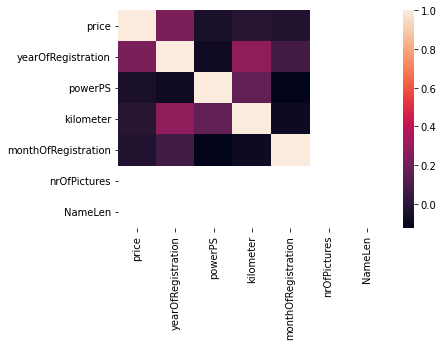

In [ ]:
sns.heatmap(car_df.corr()) # карта корреляций между признаками

In [ ]:
car_df.corr() # числовые значения признаков

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,NameLen
price,1.000000,0.230095,-0.047168,-0.007647,-0.019388,NaN,NaN
yearOfRegistration,0.230095,1.000000,-0.079896,0.283323,0.076341,NaN,NaN
powerPS,-0.047168,-0.079896,1.000000,0.160544,-0.124806,NaN,NaN
kilometer,-0.007647,0.283323,0.160544,1.000000,-0.088753,NaN,NaN
monthOfRegistration,-0.019388,0.076341,-0.124806,-0.088753,1.000000,NaN,NaN
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NameLen,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
car_df['price'].corr(car_df['powerPS'], method='pearson') # коэффициент корреляции Пирсона между стоимостью автомобиля и мощностью двигателя

-0.0471683129732646

In [ ]:
car_df['price'].corr(car_df['powerPS'], method='spearman') # коэффициент корреляции Спирмена между стоимостью автомобиля и мощностью двигателя

-0.1596503227531241

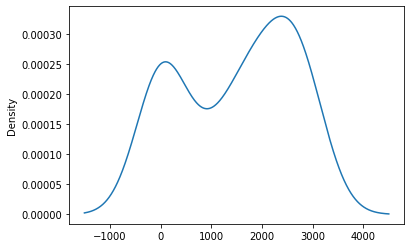

In [ ]:
car_df['price'].plot.kde() # плотность распределения 

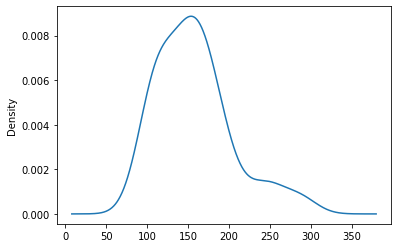

In [ ]:
car_df['powerPS'].plot.kde() # плотность распределения 

In [ ]:
# Добавьте в набор данных признак, являющийся суммой двух других признаков

car_df['SumPowerKm'] = car_df['powerPS'] + car_df['kilometer'] 
car_df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,NameLen,SumPowerKm
6960,Opel_Commodore,privat,Angebot,2500,test,limousine,1972,automatik,160,andere,80000,10,benzin,opel,nein,0,53,80160
24177,Opel_Diplomat_B_Bj._1976_Restaurationsbasis_m....,privat,Angebot,1600,control,limousine,1976,automatik,140,andere,70000,5,benzin,opel,nein,0,53,70140
29207,Opel_Rekord,privat,Angebot,1000,test,limousine,1978,automatik,101,andere,20000,3,benzin,opel,nein,0,53,20101
38832,Mercedes_Benz_230_coupe_w123_Automatik,privat,Angebot,2650,control,coupe,1977,automatik,109,andere,150000,10,benzin,mercedes_benz,nein,0,53,150109
39545,Opel_Commodore,privat,Angebot,2100,test,coupe,1971,manuell,160,andere,150000,3,benzin,opel,nein,0,53,150160
